# Customer Churn Prediction

Customer churn also known as customer attrition occurs when a customer stops using a company's products or services.

Customer churn affects profitability, especially in industries where revenues are heavily dependent on subscriptions (e.g. banks, telephone and internet service providers, pay-TV companies, insurance firms, etc.). It is estimated that acquiring a new customer can cost up to five times more than retaining an existing one.

In this tutorial, we will train a Neural Network to predict customer attrition based on customer attributes.

## Upload the Customer Churn Records Dataset to Google Colab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records.csv


## Importing Necessary Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
import joblib
from tensorflow.keras.models import load_model



In [3]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [5]:
df["Exited"].value_counts()

,count
Exited,
0,7962
1,2038


**Unbalanced Dataset**

# Data Cleaning

In [6]:
df.drop(["CustomerId","RowNumber", "Surname"], inplace = True, axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [8]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [9]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df["Gender"]= df["Gender"].map({
    "Female":1, "Male":0
})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# EDA

Text(0.5, 0, 'Customer Exited?')

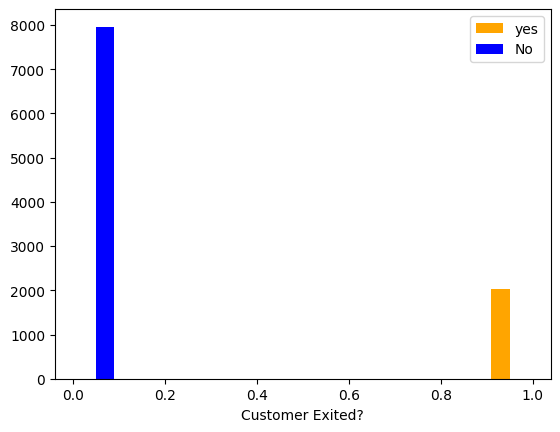

In [12]:
x = df[df["Exited"]==1]["Exited"]
y =  df[df["Exited"]==0]["Exited"]
x.head()
plt.hist([x,y], color = ["orange","blue"])
plt.legend(labels = ["yes", "No"])
plt.xlabel("Customer Exited?")

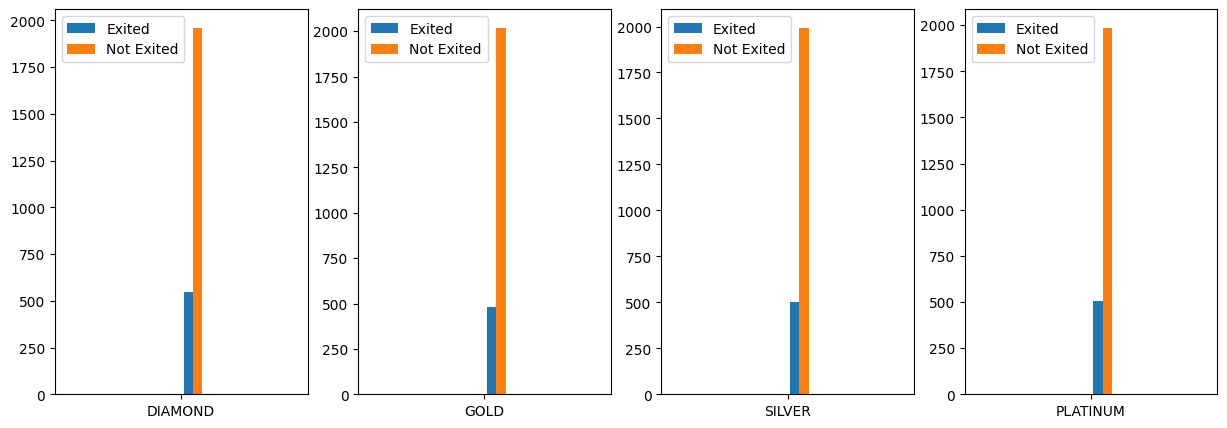

In [13]:
fig, axs = plt.subplots(1, len(df["Card Type"].unique()), figsize=(15, 5))
for i,item in enumerate(df["Card Type"].unique()):

    x = df[(df["Card Type"]==item) & (df["Exited"] ==1)]["Card Type"]
    y = df[(df["Card Type"]==item) & (df["Exited"] ==0)]["Card Type"]
    axs[i].hist([x,y])
    axs[i].legend(labels=["Exited", "Not Exited"])


df = df.drop(["Card Type"], axis=1)


In [14]:
cols = df.select_dtypes(include="number").columns
df2 = df[cols]

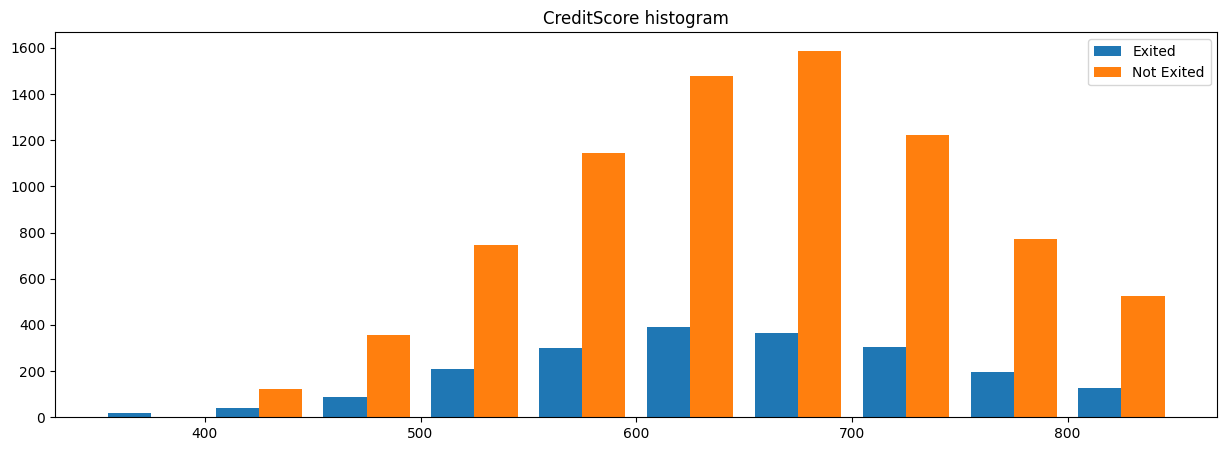

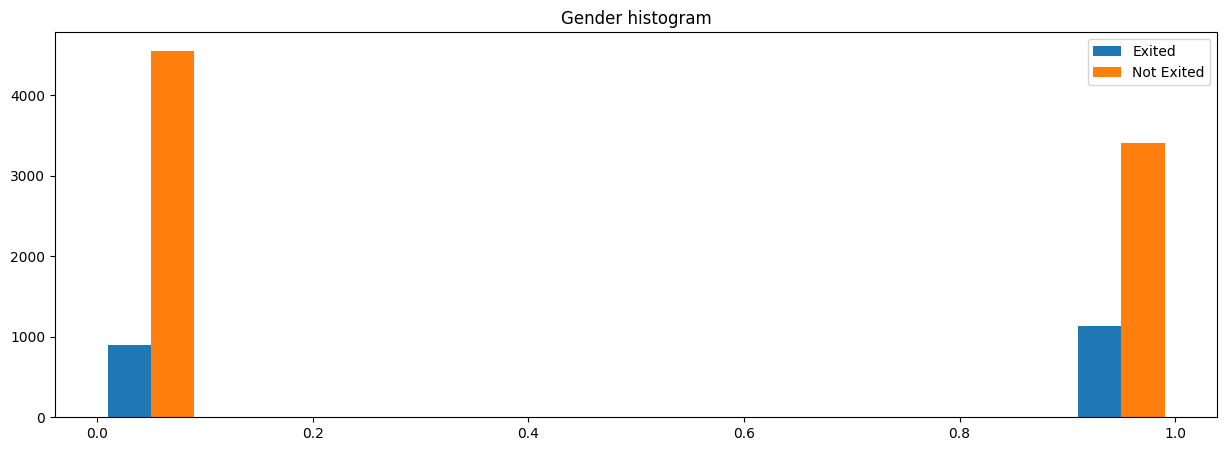

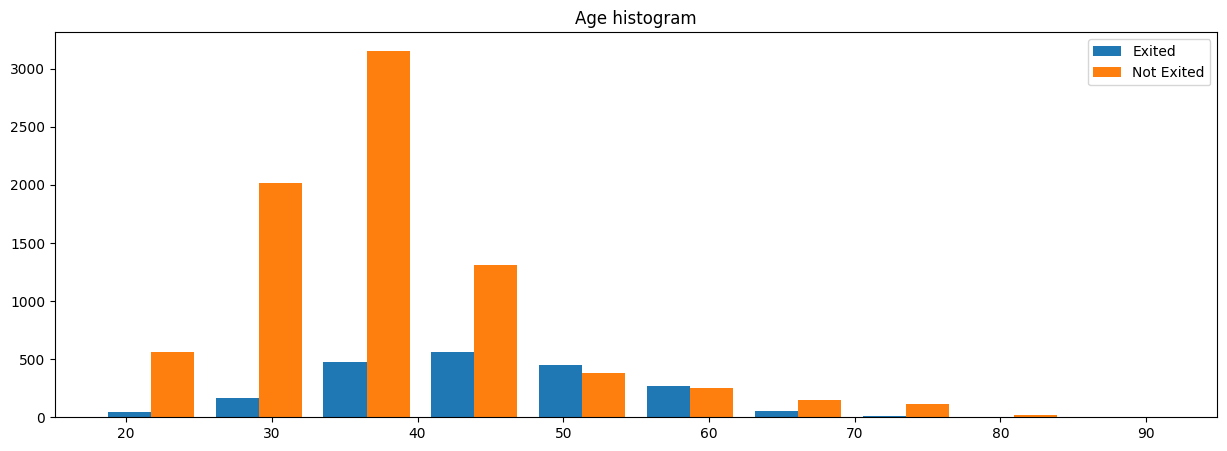

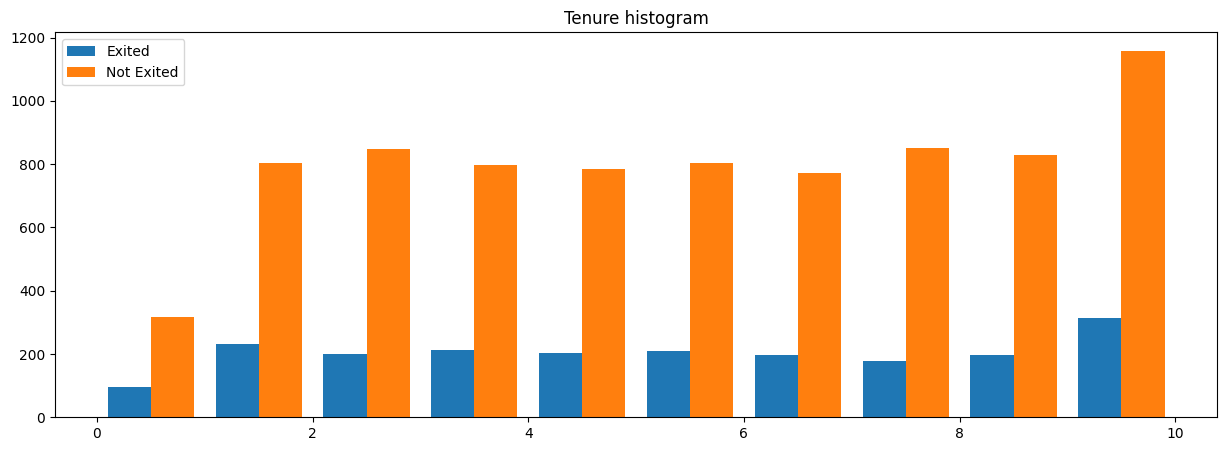

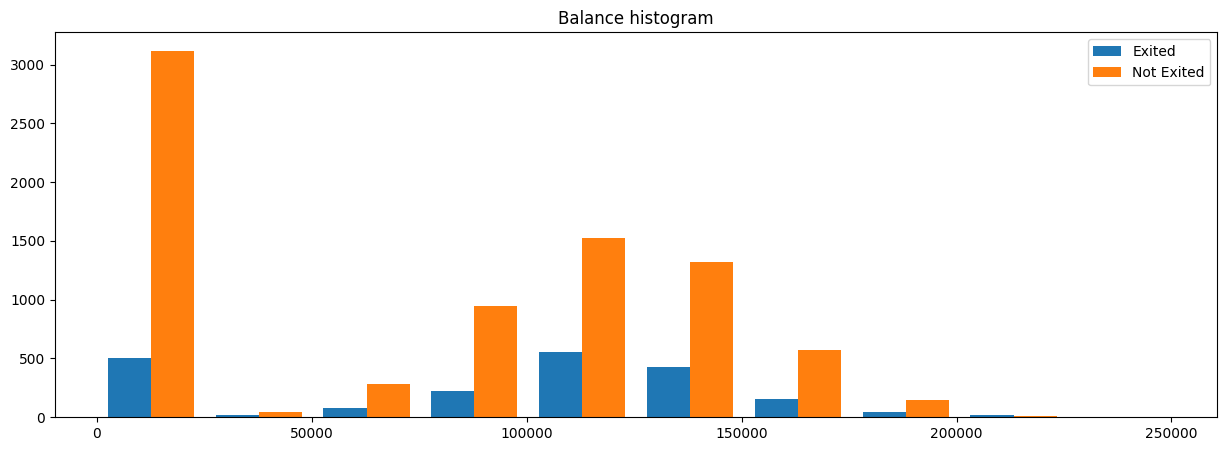

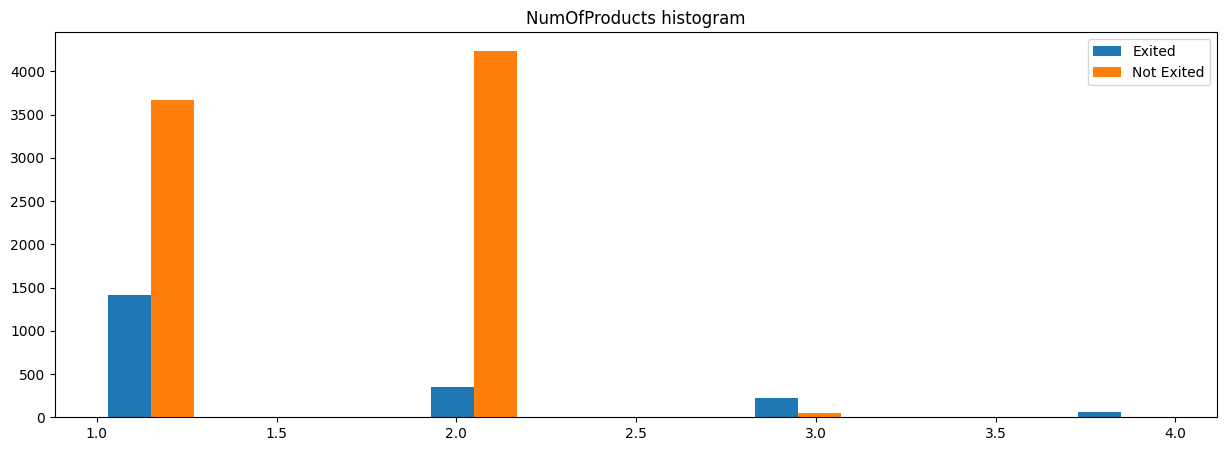

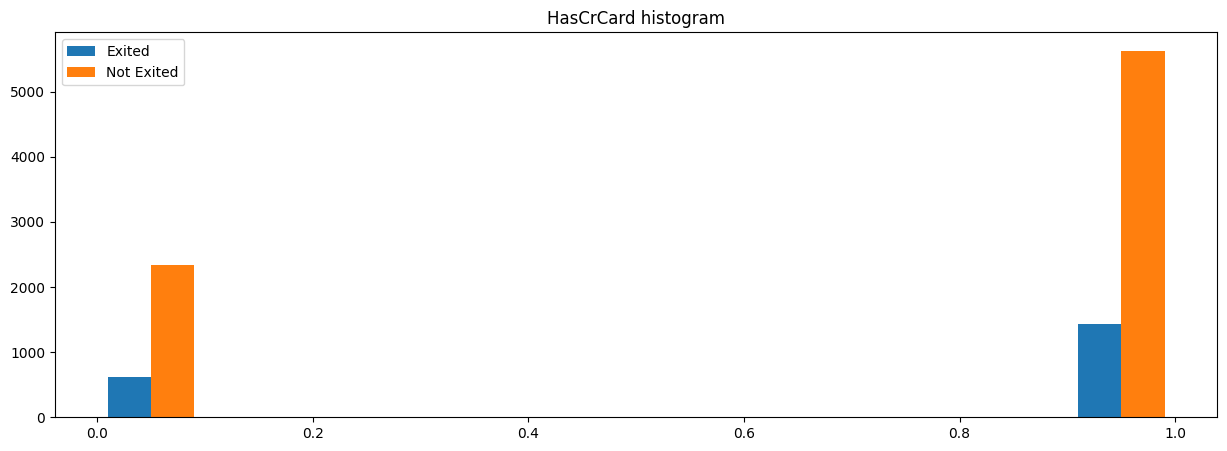

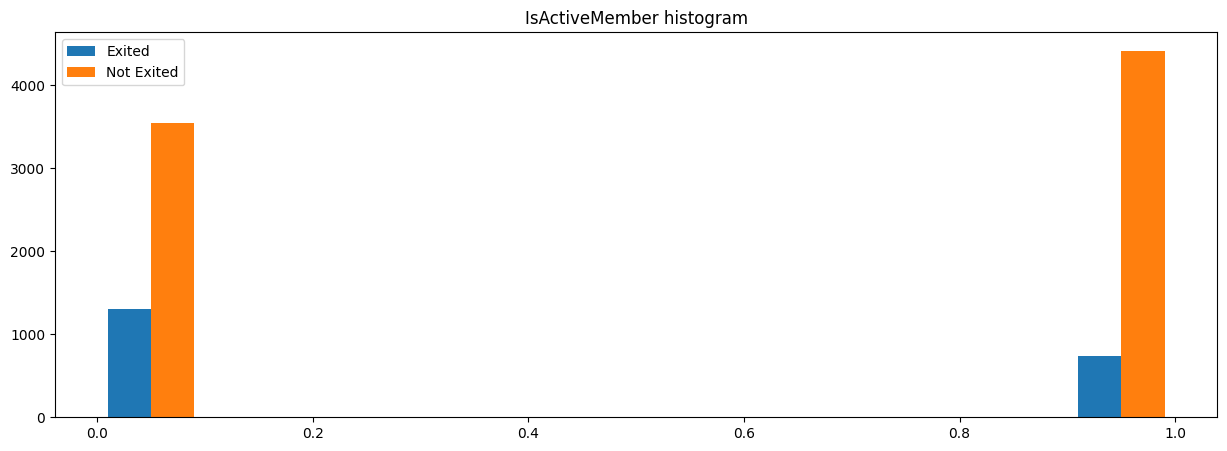

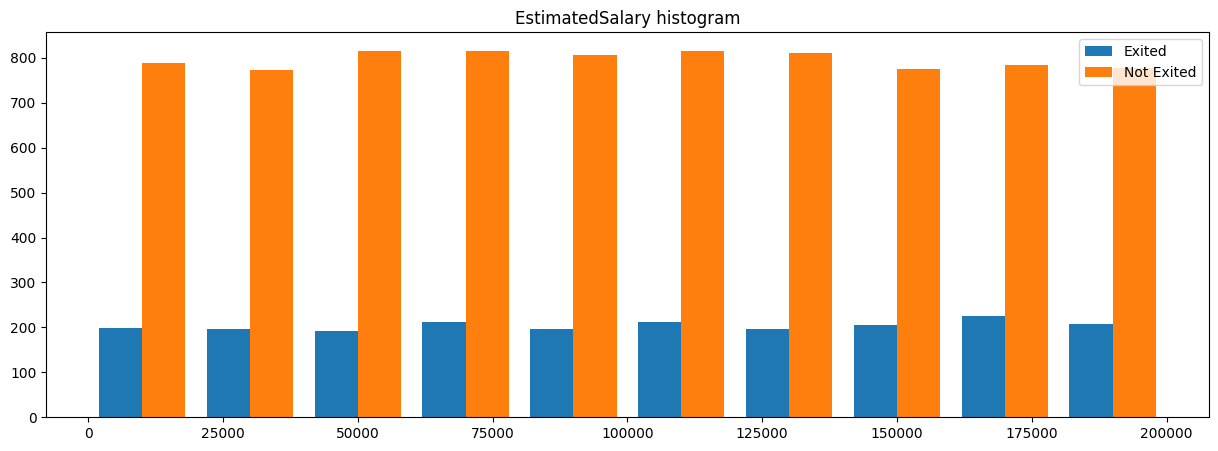

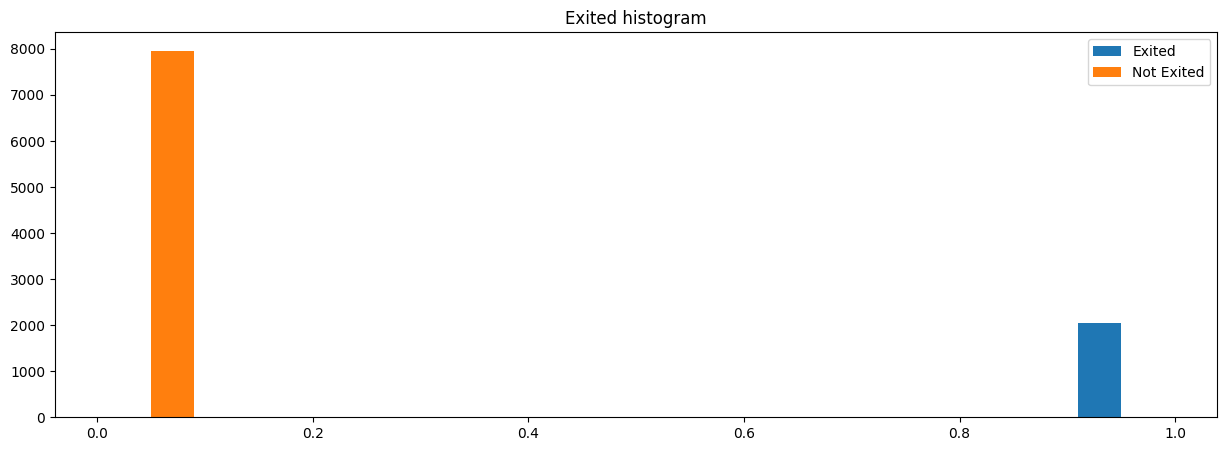

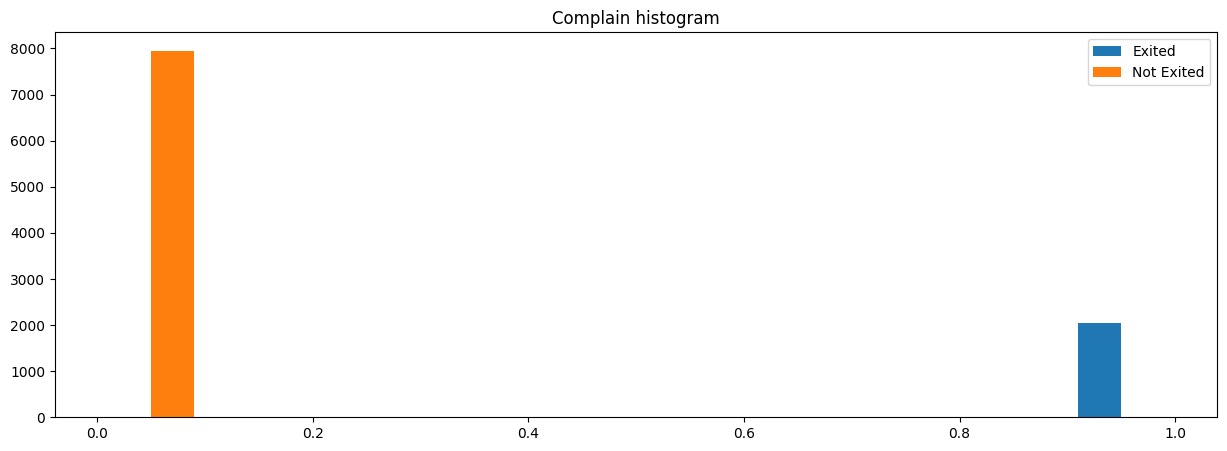

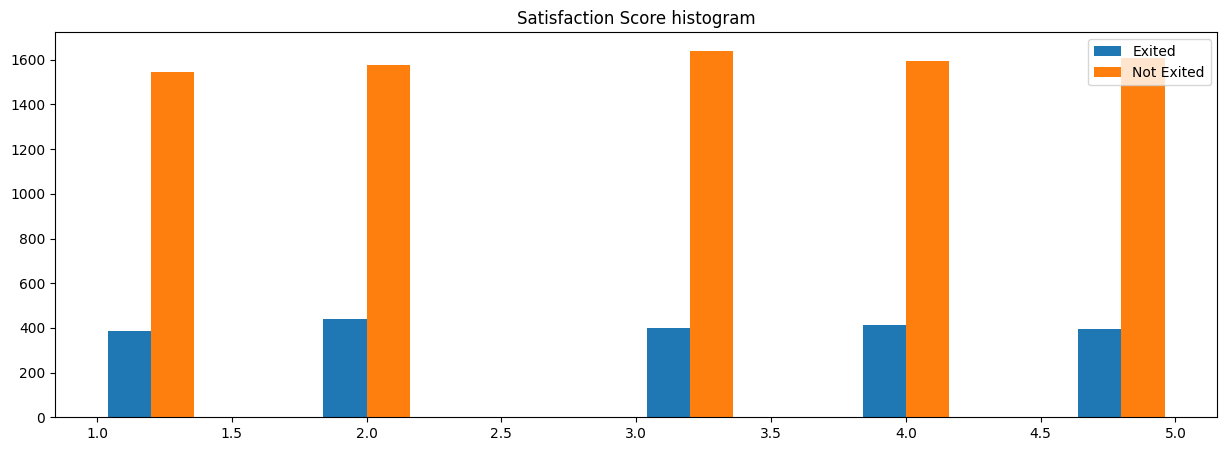

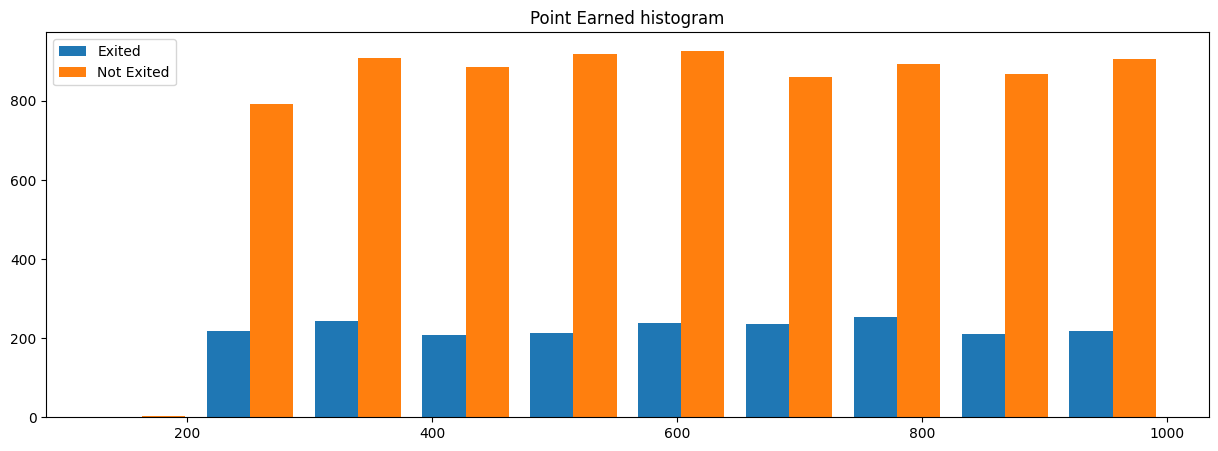

In [15]:

for col in cols:
    x = df[(df["Exited"] ==1)][col]
    y = df[(df["Exited"] ==0)][col]
    plt.figure(figsize=(15,5))
    plt.title(f"{col} histogram")
    plt.hist([x,y])
    plt.legend(labels=["Exited", "Not Exited"])

In [16]:
df = df.drop(["Point Earned","EstimatedSalary"], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 937.6+ KB


# One Hot Encoding

In [18]:
objcols = df.select_dtypes(include = "object").columns
print(objcols)

encoder = OneHotEncoder(drop= "first")
x = encoder.fit_transform(df[objcols]).toarray()

x = pd.DataFrame(x, columns = encoder.get_feature_names_out())
temp = df.drop(objcols, axis=1)
temp = temp.drop(["Exited"], axis=1)
x = pd.concat([temp,x], axis=1)
x.head()

Index(['Geography'], dtype='object')


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,1,2,0.0,0.0
1,608,1,41,1,83807.86,1,0,1,1,3,0.0,1.0
2,502,1,42,8,159660.80,3,1,0,1,3,0.0,0.0
3,699,1,39,1,0.00,2,0,0,0,5,0.0,0.0
4,850,1,43,2,125510.82,1,1,1,0,5,0.0,1.0


In [19]:
x.shape

(10000, 12)

# Scaling the dataset

In [20]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns= x.columns)
joblib.dump(scaler, 'scaler.save')
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Geography_Germany,Geography_Spain
0,0.538,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,1.0,0.25,0.0,0.0
1,0.516,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,1.0,0.50,0.0,1.0
2,0.304,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,1.0,0.50,0.0,0.0
3,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.0,1.00,0.0,0.0
4,1.000,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.0,1.00,0.0,1.0


In [21]:
y = df["Exited"]

# Training testing datset split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    stratify = y,
    test_size = 0.25,
    random_state = 202,
)

In [23]:
x_train.shape, x_test.shape

((7500, 12), (2500, 12))

In [24]:
y_train.value_counts(), y_test.value_counts()

(Exited
 0    5972
 1    1528
 Name: count, dtype: int64,
 Exited
 0    1990
 1     510
 Name: count, dtype: int64)

# Handling The imbalance

In [25]:
def use_smote(x_train, y_train):
    smote = SMOTE(sampling_strategy = "minority")
    x_train, y_train = smote.fit_resample(x_train, y_train)

    return (x_train, y_train)


**Using Smote**

In [26]:
x_train_smot, y_train_smot = use_smote(x_train, y_train)
y_train_smot.value_counts()

,count
Exited,
0,5972
1,5972


# Training the model

In [27]:
def ANN(x_train, y_train, epochs):
    model = keras.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Dense(100, activation = "relu"),
        keras.layers.Dense(200, activation = "relu"),
        keras.layers.Dense(1, activation = "sigmoid")

    ])
    model.compile(
        optimizer="adam",
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["f1_score"]
    )
    model.fit(x_train, y_train, epochs=epochs)
    return model

from sklearn.metrics import classification_report

def print_classification_report(model,x_test, y_true):
    y_pred = model.predict(x_test)
    y_class = y_pred.flatten()>=0.5
    print(classification_report(y_true, y_class))



# **smot model**

In [28]:
model_smot = ANN(x_train_smot, y_train_smot, epochs=200)

Epoch 1/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - f1_score: 0.6655 - loss: 0.1573
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.6662 - loss: 0.0046
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6680 - loss: 0.0074
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6665 - loss: 0.0080
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6631 - loss: 0.0054
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6638 - loss: 0.0067
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6664 - loss: 0.0047
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6786 - loss: 0.0079
Epoch 9/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6717 - loss: 0.0054
Epoch 10/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6708 - loss: 0.0046
Epoch 11/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.6803 - loss: 0.0039
Epoch 12/200
374/374 ━━━━━━━━━━━━━━━━━━━━

In [29]:
print_classification_report(model_smot, x_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       0.99      0.99      0.99       510

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [30]:
y_pred = model_smot.predict(x_test)
y_class = y_pred.flatten()>=0.5

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Confusion Matrix

Text(50.722222222222214, 0.5, 'Predicted')

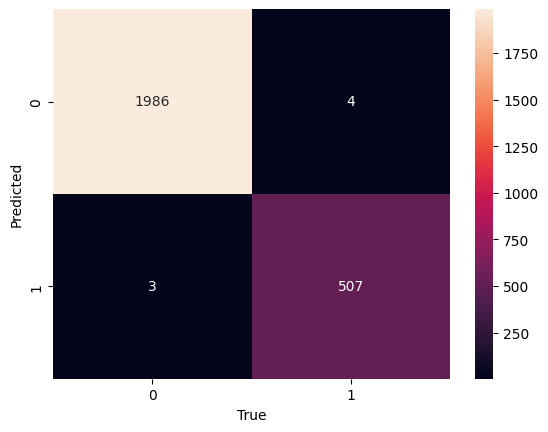

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_class)

import seaborn as sns

plt.figure()
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel("True")
plt.ylabel("Predicted")

In [32]:
# Saving the SMOTE model
model_smot.save("model_smot.h5")

In [33]:
import pandas as pd

# Example single customer data in the same structure as training data
customer_data = pd.DataFrame({
    'CreditScore': [619],
    'Geography': ['France'],  # We will one-hot encode this
    'Gender': ['Female'],     # We will map this to 1 for Female and 0 for Male
    'Age': [42],
    'Tenure': [2],
    'Balance': [0],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'Complain': [1],
    'Satisfaction Score': [2]
})


In [34]:
# Map Gender column
customer_data['Gender'] = customer_data['Gender'].map({'Female': 1, 'Male': 0})


In [35]:
# One-hot encode Geography column to match specific format
customer_data = pd.get_dummies(customer_data, columns=['Geography'], drop_first=True)

# Ensure the columns are present, adding missing ones as needed
for col in ['Geography_Germany', 'Geography_Spain']:
    if col not in customer_data.columns:
        customer_data[col] = 0


In [36]:
# Final column order for consistency
column_order = [
    'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score',
    'Geography_Germany', 'Geography_Spain'
]
customer_data = customer_data[column_order]


In [37]:
customer_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,1,2,0,0


In [38]:
loaded_scaler = joblib.load('scaler.save')

# Use transform() instead of fit_transform() to scale customer_data based on training data ranges
scaled_customer_data = pd.DataFrame(loaded_scaler.transform(customer_data), columns=customer_data.columns)

# Display the scaled customer data
scaled_customer_data.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Geography_Germany,Geography_Spain
0,0.538,1.0,0.324324,0.2,0.0,0.0,1.0,1.0,1.0,0.25,0.0,0.0


In [41]:
# Load the SMOTE model
loaded_model_smot = load_model("model_smot.h5")

In [42]:
# Prediction with the SMOTE model
smot_prediction = loaded_model_smot.predict(scaled_customer_data)
smot_class = smot_prediction.flatten() >= 0.5

print("SMOTE Model Prediction (Churn=1, No Churn=0):", smot_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
SMOTE Model Prediction (Churn=1, No Churn=0): True
